# Визуализация категориальных переменных

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [5]:
stats = df.groupby(['year', 'price_category']).agg({'fuel': 'first',
                                                   'odometer': 'mean'})
stats = stats.rename(columns={'fuel': 'fuel_first', 'odometer': 'odometer_mean'})
stats

fuel_first  odometer_mean
year price_category                          
1995 high                  gas   57305.753086
     low                   gas  105530.054187
     medium                gas   69436.685315
1996 high                other  153710.000000
     low                   gas  136428.187500
...                        ...            ...
2021 high                  gas    2459.433333
     low                 other   29316.900000
     medium                gas   49381.875000
2022 high                  gas  142002.500000
     low                   gas  180000.000000

[82 rows x 2 columns]

In [6]:
stats = df.groupby(['fuel'], as_index=False)[['id']].count()
stats = stats.rename(columns={'id': 'count'})
stats

,fuel,count
0,diesel,643
1,electric,44
2,gas,8298
3,hybrid,104
4,other,779


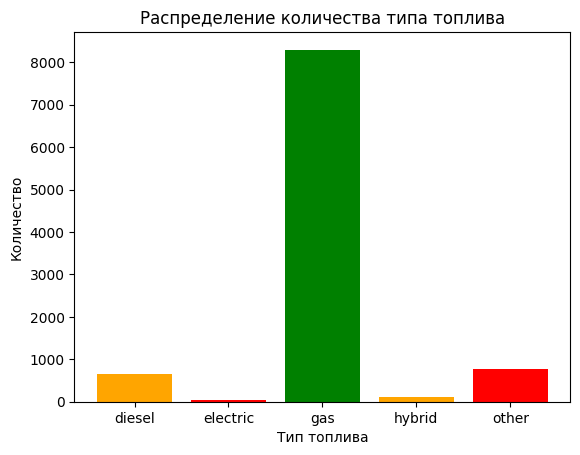

In [10]:
plt.bar(stats['fuel'], stats['count'], color=['orange', 'red', 'green'])
plt.xlabel('Тип топлива')
plt.ylabel('Количество')
plt.title('Распределение количества типа топлива');

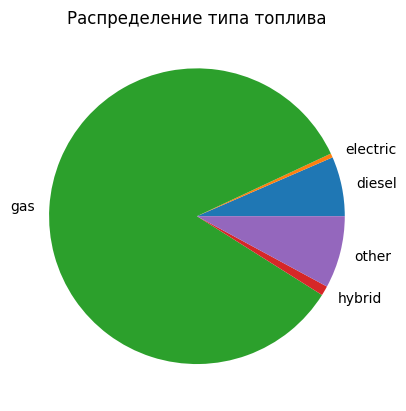

In [13]:
plt.pie(stats['count'], labels=stats['fuel'])
plt.title('Распределение типа топлива')
plt.show();

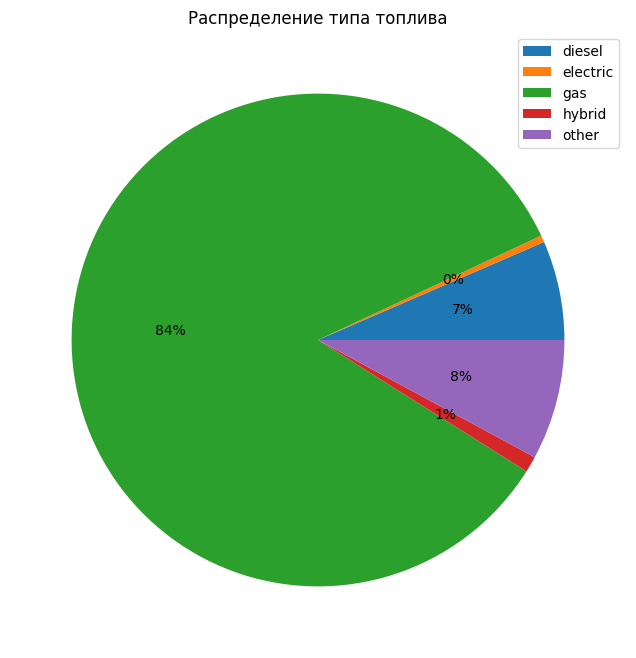

In [23]:
plt.figure(figsize=(12, 8))
plt.pie(stats['count'], labels=stats['fuel'], labeldistance=None, autopct = '%1.f%%')
plt.title('Распределение типа топлива')
plt.legend()
plt.show();

# Корелляции

In [24]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


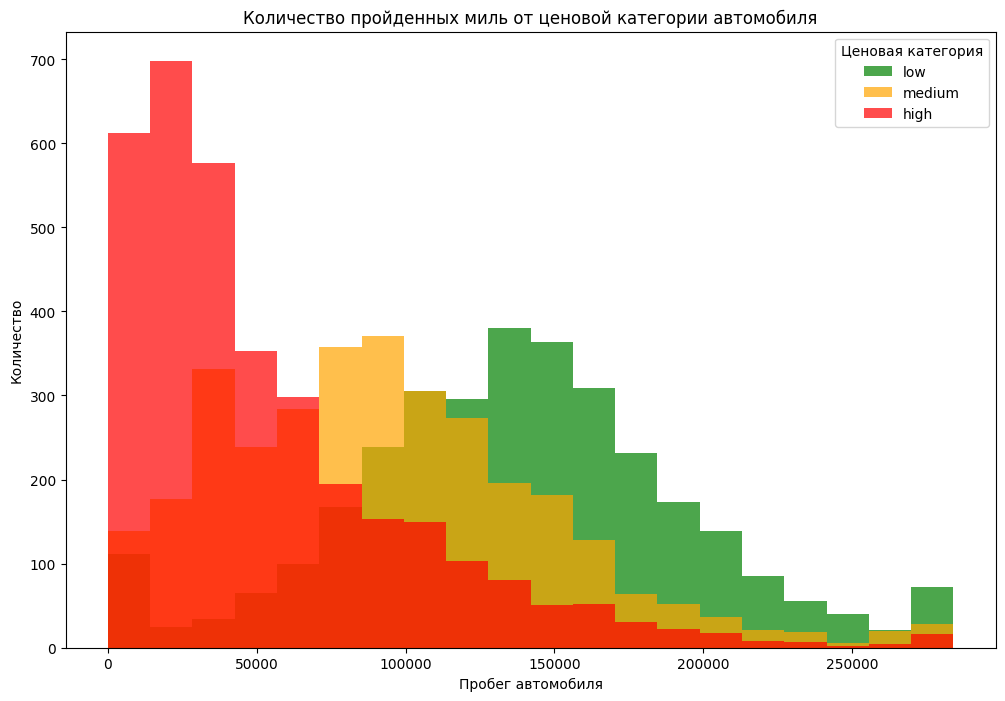

In [25]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_caterory in colors:
    color = colors[price_caterory]
    data = df[df['price_category'] == price_caterory]
    
    ax.hist(data['odometer'], bins=20, color=color, alpha=.7)
    
plt.ylabel('Количество')
plt.xlabel('Пробег автомобиля')
plt.title('Количество пройденных миль от ценовой категории автомобиля')
plt.legend(colors, title='Ценовая категория');

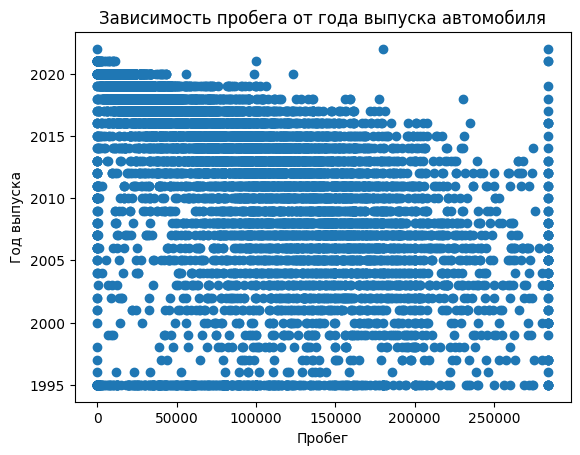

In [26]:
plt.figure()
plt.scatter(df['odometer'], df['year'])
plt.title('Зависимость пробега от года выпуска автомобиля')
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')

plt.show();

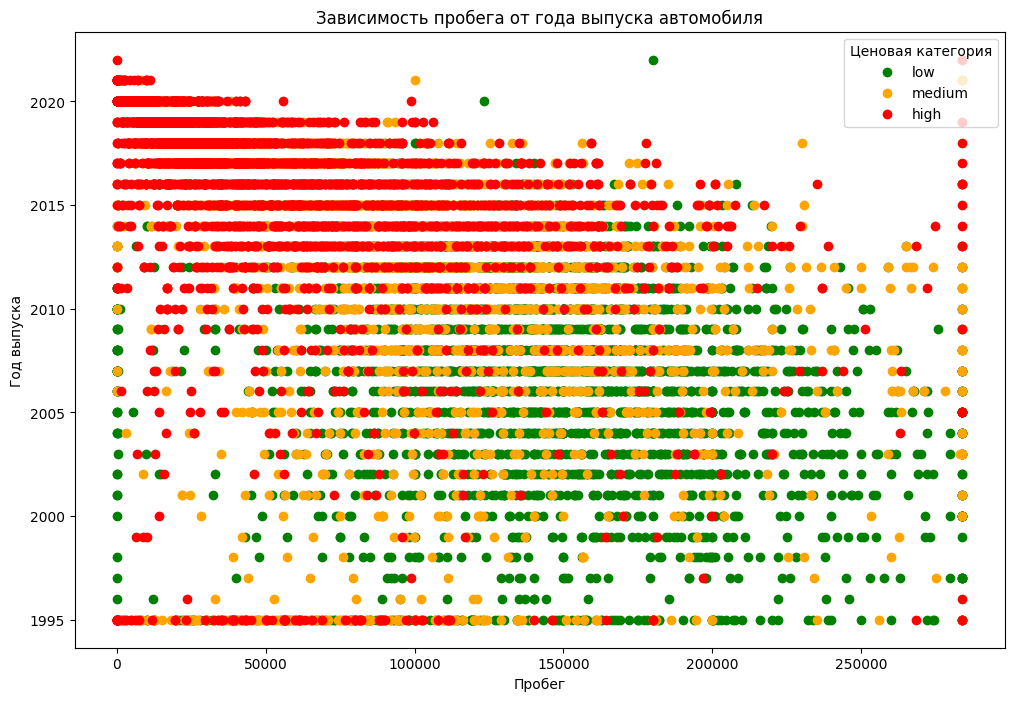

In [28]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]
    
    ax.scatter(data['odometer'], data['year'], c=color, label=price_category)
    
ax.legend(loc='upper right', title='Ценовая категория');
plt.title('Зависимость пробега от года выпуска автомобиля')
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')
plt.show();

In [29]:
# рассчитываем коэффициент корелляции
df.year.corr(df.odometer)

-0.5087961565425961

In [30]:
df.corr()

/var/folders/mm/2c6bnjk559g2btv241j7f9lh0000gn/T/ipykernel_1394/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,year,odometer,lat,long
id,1.000000,-0.032689,-0.100205,0.048796,-0.077752,-0.106567
price,-0.032689,1.000000,0.072763,-0.057455,0.002235,-0.001371
year,-0.100205,0.072763,1.000000,-0.508796,-0.031854,0.007378
odometer,0.048796,-0.057455,-0.508796,1.000000,0.024401,0.007551
lat,-0.077752,0.002235,-0.031854,0.024401,1.000000,-0.164737
long,-0.106567,-0.001371,0.007378,0.007551,-0.164737,1.000000


/var/folders/mm/2c6bnjk559g2btv241j7f9lh0000gn/T/ipykernel_1394/437178856.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  columns = df.corr().columns.tolist()
/var/folders/mm/2c6bnjk559g2btv241j7f9lh0000gn/T/ipykernel_1394/437178856.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(df.corr())


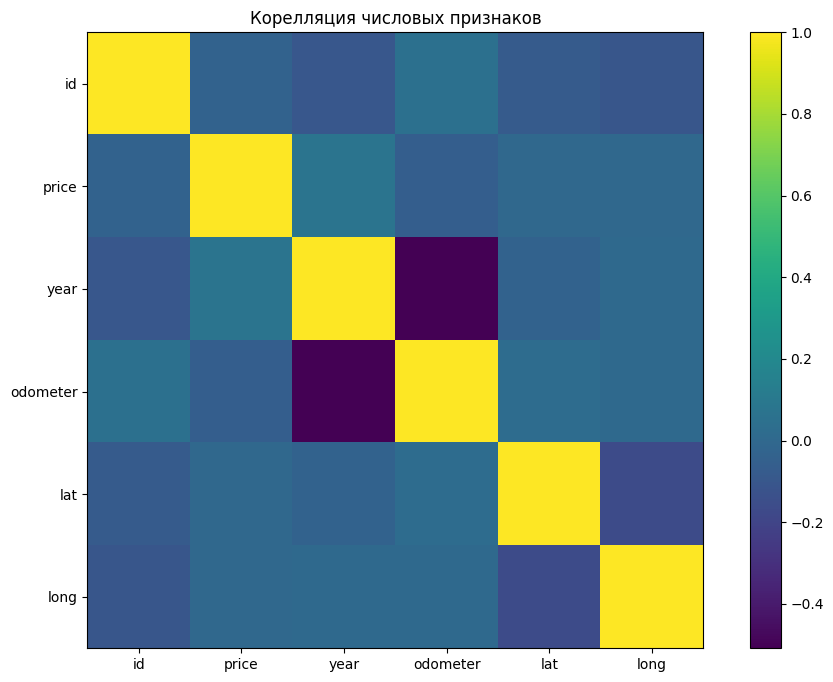

In [31]:
plt.figure(figsize=(12, 8))

columns = df.corr().columns.tolist()
plt.imshow(df.corr())

plt.title('Корелляция числовых признаков')
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

In [32]:
import seaborn as sns

/var/folders/mm/2c6bnjk559g2btv241j7f9lh0000gn/T/ipykernel_1394/2339590298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f",  cmap="crest", ax=ax);


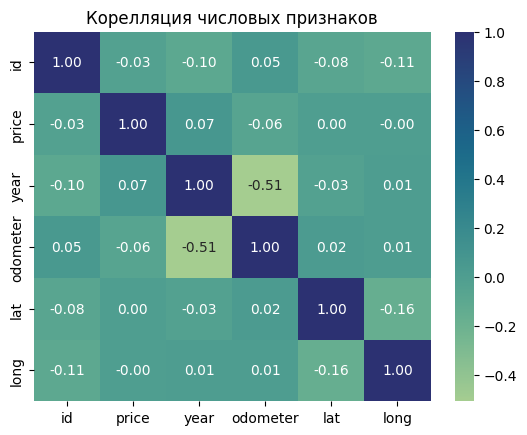

In [43]:
ax = plt.axes()
sns.heatmap(df.corr(), annot=True, fmt=".2f",  cmap="crest", ax=ax);
ax.set_title('Корелляция числовых признаков');